1 Hospital Discharge Analysis

1.0.1 Importing Important Libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.0.2 Reading Data from csv file

In [121]:
data=pd.read_csv("mdcpddmasked.csv")

In [122]:
data.head()

,patcnty1,dsch_yr,mdc,mdc_desc,Discharges,AnnotationCode,AnnotationDesc
0,Alameda,2012,1,"NERVOUS SYSTEM, DISEASES & DISORDERS",7792.0,NaN,NaN
1,Alameda,2012,2,"EYE, DISEASES & DISORDERS",195.0,NaN,NaN
2,Alameda,2012,3,"EAR, NOSE, MOUTH, & THROAT, DISEASES & DISORDERS",1413.0,NaN,NaN
3,Alameda,2012,4,"RESPIRATORY SYSTEM, DISEASES & DISORDERS",11569.0,NaN,NaN
4,Alameda,2012,5,"CIRCULATORY SYSTEM, DISEASES & DISORDERS",15745.0,NaN,NaN


In [123]:
data.tail()

,patcnty1,dsch_yr,mdc,mdc_desc,Discharges,AnnotationCode,AnnotationDesc
17771,Yuba,2023,21,"INJURIES, POISONINGS, AND TOXIC EFFECTS OF DRUGS",121.0,NaN,NaN
17772,Yuba,2023,22,BURNS,12.0,NaN,NaN
17773,Yuba,2023,23,FACTORS ON HEALTH STATUS & OTHER CONTACTS WITH...,51.0,NaN,NaN
17774,Yuba,2023,24,MULTIPLE SIGNFICANT TRAUMA,42.0,NaN,NaN
17775,Yuba,2023,25,HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS,5.0,NaN,NaN


In [124]:
data.sample(10)

,patcnty1,dsch_yr,mdc,mdc_desc,Discharges,AnnotationCode,AnnotationDesc
13044,Santa Clara,2019,13,"FEMALE REPRODUCTIVE SYSTEM, DISEASES & DISORDERS",981.0,NaN,NaN
13900,Sierra,2018,8,"MUSCULOSKELETAL SYSTEM & CONNECTIVE TISSUE, DI...",31.0,NaN,NaN
8663,Orange,2015,25,HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS,229.0,NaN,NaN
14838,Sonoma,2020,16,"BLOOD, BLOOD FORMING ORGANS,IMMUNOLOGICAL, DIS...",332.0,NaN,NaN
16239,Tulare,2016,14,"PREGNANCY, CHILDBIRTH, & THE PUERPERIUM",7626.0,NaN,NaN
3639,Imperial,2018,21,"INJURIES, POISONINGS, AND TOXIC EFFECTS OF DRUGS",223.0,NaN,NaN
12027,San Luis Obispo,2015,18,INFECTIOUS & PARASITIC DISEASES,1496.0,NaN,NaN
13959,Sierra,2021,7,"HEPATOBILIARY SYSTEM & PANCREAS, DISEASES & DI...",3.0,NaN,NaN
3040,Glenn,2019,3,"EAR, NOSE, MOUTH, & THROAT, DISEASES & DISORDERS",22.0,NaN,NaN
12593,Santa Barbara,2013,21,"INJURIES, POISONINGS, AND TOXIC EFFECTS OF DRUGS",455.0,NaN,NaN


In [125]:
data.columns

Index(['patcnty1', 'dsch_yr', 'mdc', 'mdc_desc', 'Discharges',
       'AnnotationCode', 'AnnotationDesc'],
      dtype='object')

In [126]:
data.shape

(17776, 7)

In [127]:
data.size

124432

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17776 entries, 0 to 17775
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patcnty1        17776 non-null  object 
 1   dsch_yr         17776 non-null  int64  
 2   mdc             17776 non-null  int64  
 3   mdc_desc        17776 non-null  object 
 4   Discharges      17531 non-null  float64
 5   AnnotationCode  245 non-null    float64
 6   AnnotationDesc  245 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 972.3+ KB


In [129]:
data.describe()

,dsch_yr,mdc,Discharges,AnnotationCode
count,17776.000000,17776.000000,17531.000000,245.000000
mean,2017.538423,12.662973,2560.847242,1.277551
std,3.446026,7.300555,8343.139152,0.448707
min,2012.000000,0.000000,1.000000,1.000000
25%,2015.000000,6.000000,61.000000,1.000000
50%,2018.000000,13.000000,339.000000,1.000000
75%,2021.000000,19.000000,1610.000000,2.000000
max,2023.000000,25.000000,145367.000000,2.000000


Data Cleaning and Preprocessing

1.0.3  Duplicate and Null values checking

In [130]:
data.duplicated().sum()

0

In [131]:
data.isnull().sum()

patcnty1              0
dsch_yr               0
mdc                   0
mdc_desc              0
Discharges          245
AnnotationCode    17531
AnnotationDesc    17531
dtype: int64

In [132]:
data.isna().sum().sum()

35307

1.0.4 Removing the AnnotationCode,AnnotationDesc columns 

In [133]:
data.drop(["AnnotationCode","AnnotationDesc"],axis=1,inplace=True)

In [134]:
data.isna().sum()

patcnty1        0
dsch_yr         0
mdc             0
mdc_desc        0
Discharges    245
dtype: int64

1.0.5 Fill the NaN values with median of the column

In [135]:
data.fillna(data.median(numeric_only=True), inplace=True)

In [136]:
data.isna().sum()

patcnty1      0
dsch_yr       0
mdc           0
mdc_desc      0
Discharges    0
dtype: int64

In [137]:
data.to_csv("cleaned_data.csv", index=False)

In [138]:
data["dsch_yr"].value_counts()

dsch_yr
2020    1528
2019    1525
2023    1494
2022    1491
2021    1485
2015    1484
2016    1481
2018    1466
2017    1463
2012    1457
2014    1454
2013    1448
Name: count, dtype: int64

<Axes: >

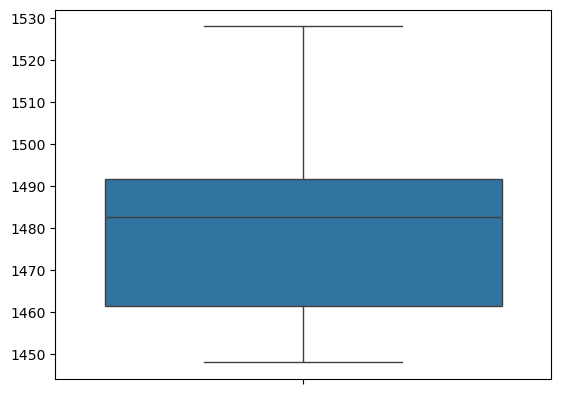

In [139]:
sns.boxplot(data["dsch_yr"].value_counts().values)

In [140]:
data['patcnty1'].value_counts()

patcnty1
Los Angeles              312
San Bernardino           312
Orange                   312
Kern                     312
Alameda                  311
San Diego                311
Riverside                311
Ventura                  310
Santa Clara              310
Contra Costa             310
San Mateo                310
San Joaquin              310
San Francisco            310
Tulare                   309
Solano                   309
Monterey                 309
Out of State/Homeless    309
Fresno                   308
Madera                   308
Sonoma                   307
Merced                   307
Kings                    307
Sacramento               307
Imperial                 306
Stanislaus               306
Marin                    305
Humboldt                 305
Placer                   305
Shasta                   304
Santa Cruz               304
Santa Barbara            304
Lake                     304
Yuba                     304
Napa                     304
Mendo

In [141]:
data.mdc_desc.unique()

array(['NERVOUS SYSTEM, DISEASES & DISORDERS',
       'EYE, DISEASES & DISORDERS',
       'EAR, NOSE, MOUTH, & THROAT, DISEASES & DISORDERS',
       'RESPIRATORY SYSTEM, DISEASES & DISORDERS',
       'CIRCULATORY SYSTEM, DISEASES & DISORDERS',
       'DIGESTIVE SYSTEM, DISEASES & DISORDERS',
       'HEPATOBILIARY SYSTEM & PANCREAS, DISEASES & DISORDERS',
       'MUSCULOSKELETAL SYSTEM & CONNECTIVE TISSUE, DISEASES & DISORDERS',
       'SKIN, SUBCUTANEOUS TISSUE & BREAST, DISEASES & DISORDERS',
       'ENDOCRINE, NUTRITIONAL, AND METABOLIC, DISEASES & DISORDERS',
       'KIDNEY AND URINARY TRACT, DISEASES & DISORDERS',
       'MALE REPRODUCTIVE SYSTEM, DISEASES & DISORDERS',
       'FEMALE REPRODUCTIVE SYSTEM, DISEASES & DISORDERS',
       'PREGNANCY, CHILDBIRTH, & THE PUERPERIUM',
       'NEWBORNS AND NEONATE CONDITIONS BEGAN IN PERINATAL PERIOD',
       'BLOOD, BLOOD FORMING ORGANS, IMMUNOLOGICAL, DISEASES & DISORDERS',
       'MYELOPROLIFERATIVE DISEASES & POORLY DIFFERENTIATED NEOPL

Text(0, 0.5, 'Count')

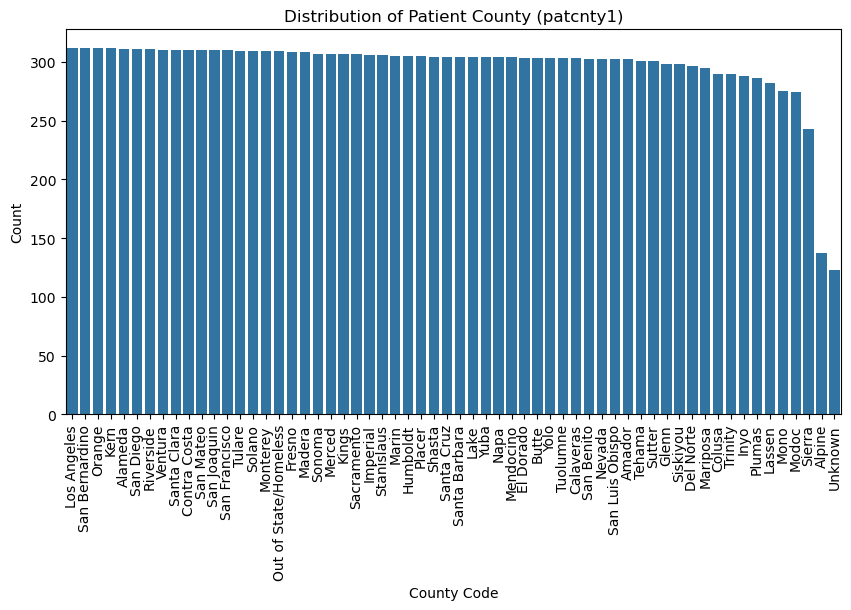

In [142]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data["patcnty1"], order=data["patcnty1"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Patient County (patcnty1)")
plt.xlabel("County Code")
plt.ylabel("Count")

In [143]:
max_county = data["patcnty1"].value_counts().idxmax()  
min_county = data["patcnty1"].value_counts().idxmin()  
max_count = data["patcnty1"].value_counts().max()  
min_count = data["patcnty1"].value_counts().min()
print(f"County with most patients: {max_county} ({max_count} patients)")
print(f"County with least patients: {min_county} ({min_count} patients)")

County with most patients: Los Angeles (312 patients)
County with least patients: Unknown (123 patients)


In [144]:
data["dsch_yr"].value_counts()

dsch_yr
2020    1528
2019    1525
2023    1494
2022    1491
2021    1485
2015    1484
2016    1481
2018    1466
2017    1463
2012    1457
2014    1454
2013    1448
Name: count, dtype: int64

In [145]:
data.groupby("dsch_yr")["Discharges"].sum()


dsch_yr
2012    3898143.0
2013    3812962.0
2014    3801957.0
2015    3840748.0
2016    3850007.0
2017    3862883.0
2018    3824711.0
2019    3814077.0
2020    3434883.0
2021    3564285.0
2022    3611465.0
2023    3661147.0
Name: Discharges, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017'),
  Text(6, 0, '2018'),
  Text(7, 0, '2019'),
  Text(8, 0, '2020'),
  Text(9, 0, '2021'),
  Text(10, 0, '2022'),
  Text(11, 0, '2023')])

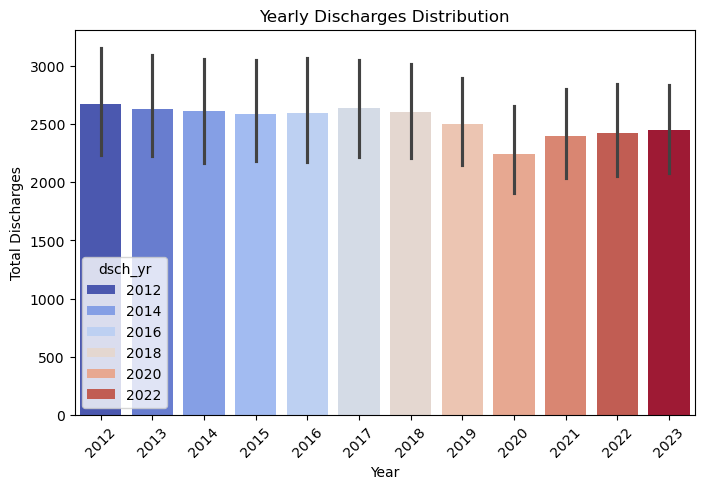

In [146]:
plt.figure(figsize=(8, 5))
sns.barplot(x="dsch_yr", y="Discharges", palette="coolwarm",data=data,hue="dsch_yr")

plt.xlabel("Year")
plt.ylabel("Total Discharges")
plt.title("Yearly Discharges Distribution")
plt.xticks(rotation=45)

Text(0, 0.5, 'Frequency')

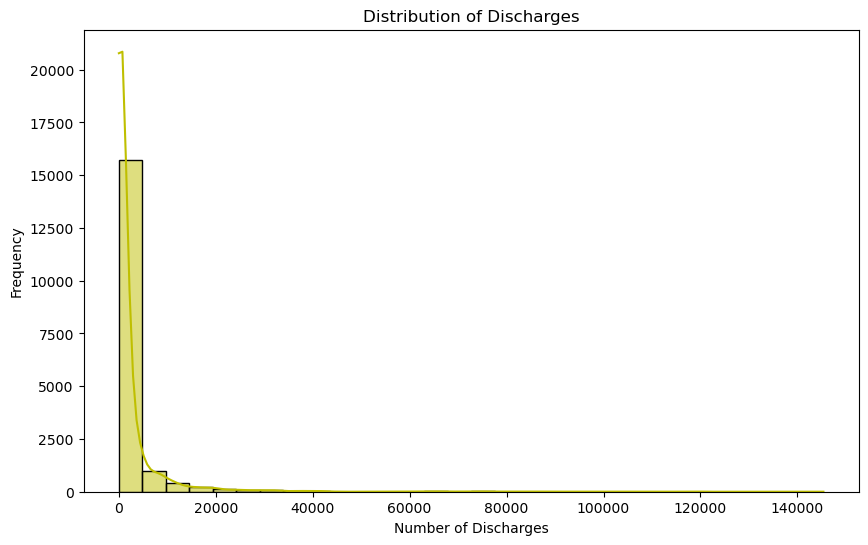

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Discharges"].dropna(),bins=30, kde=True, color="y")
plt.title("Distribution of Discharges")
plt.xlabel("Number of Discharges")
plt.ylabel("Frequency")



In [94]:
a=data.corr(numeric_only=True)

<Axes: >

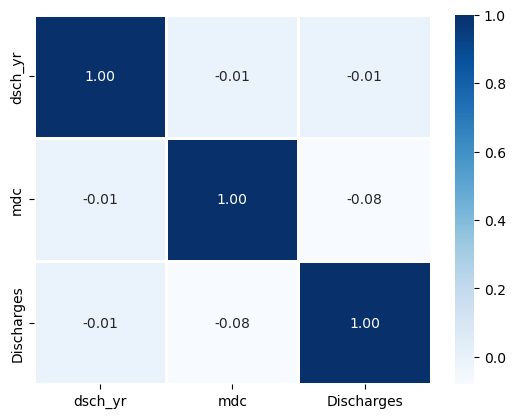

In [95]:
sns.heatmap(a,fmt="0.2f",cmap="Blues",linewidth=1,annot=True)

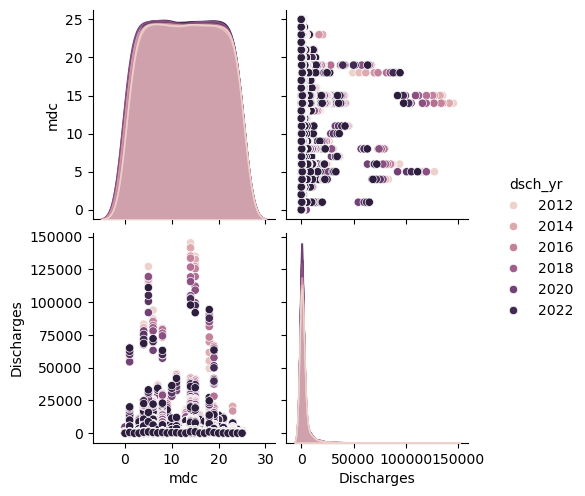

In [96]:
sns.pairplot(data,hue="dsch_yr")

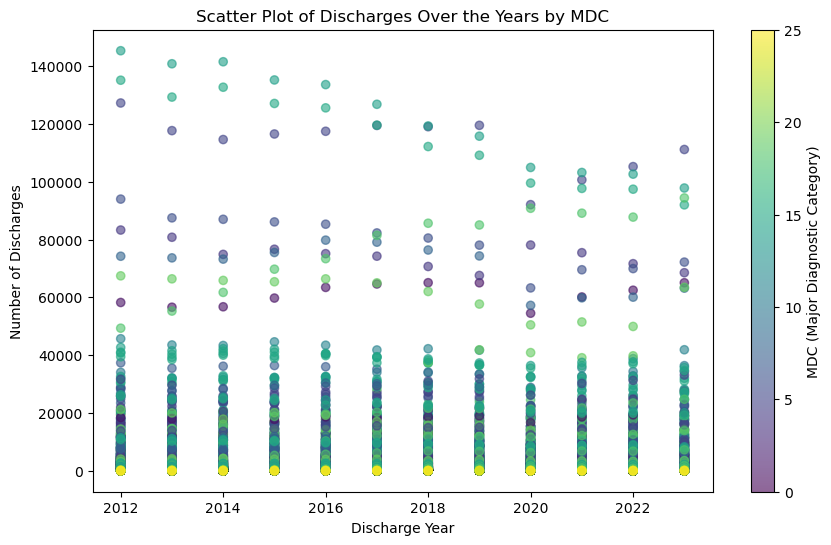

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(data["dsch_yr"], data["Discharges"], c=data["mdc"].astype(int), alpha=0.6, cmap="viridis")

# Labels and title
plt.xlabel("Discharge Year")
plt.ylabel("Number of Discharges")
plt.title("Scatter Plot of Discharges Over the Years by MDC")

# Show color bar for MDC categories
plt.colorbar(label="MDC (Major Diagnostic Category)")


OBJECTIVES: Data Visualization

1. Pie Chart (To Show Percentage of Discharges per County)

Text(0.5, 1.0, 'Top 10 Counties by Discharges')

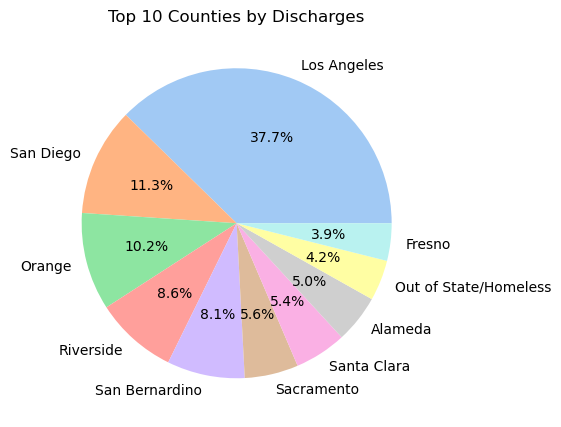

In [98]:
top_counties = data.groupby("patcnty1")["Discharges"].sum().nlargest(10) 

plt.figure(figsize=(5, 8))
plt.pie(top_counties, labels=top_counties.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Top 10 Counties by Discharges")

Insights: Los Angeles is the highest county with 37.7% discharges.
Here, top 10 counties by discharges are represented using the pie chart.

2. Disease Trend Analysis: Tracking the Number of Discharges Over Time

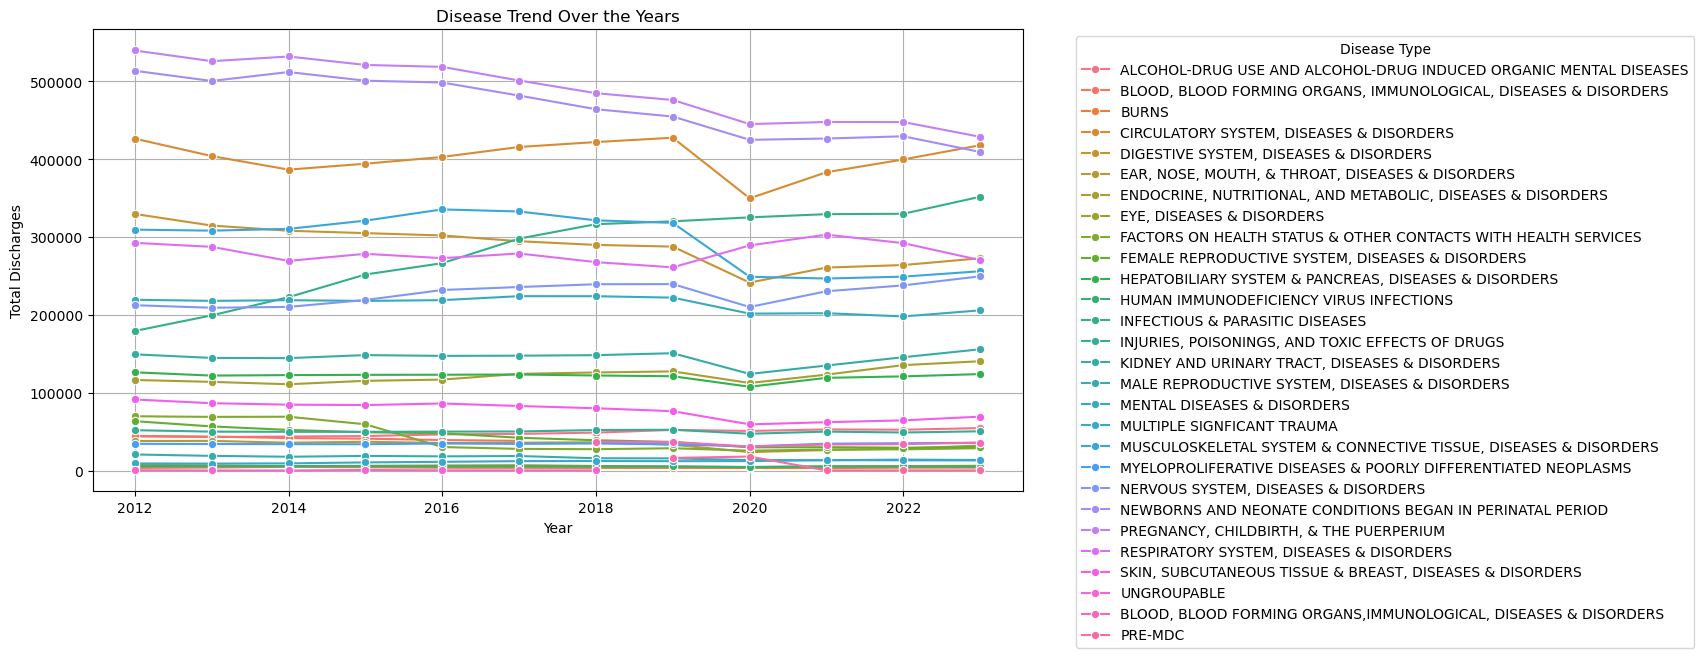

In [99]:
disease_trend = data.groupby(["dsch_yr", "mdc_desc"])["Discharges"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=disease_trend, x="dsch_yr", y="Discharges", hue="mdc_desc", marker="o")

plt.xlabel("Year")
plt.ylabel("Total Discharges")
plt.title("Disease Trend Over the Years")
plt.legend(title="Disease Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

3.Regional Health Insights: Counties with High Discharges

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'San Diego'),
  Text(2, 0, 'Orange'),
  Text(3, 0, 'Riverside'),
  Text(4, 0, 'San Bernardino'),
  Text(5, 0, 'Sacramento'),
  Text(6, 0, 'Santa Clara'),
  Text(7, 0, 'Alameda'),
  Text(8, 0, 'Out of State/Homeless'),
  Text(9, 0, 'Fresno')])

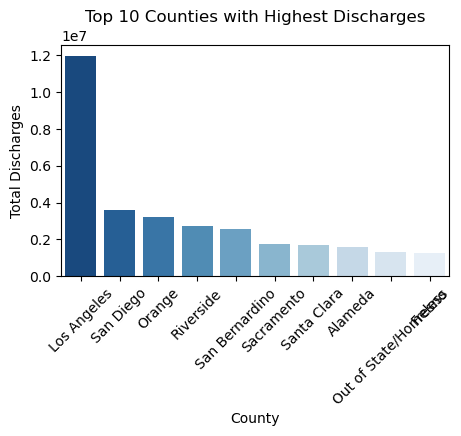

In [100]:
county_discharges = data.groupby("patcnty1")["Discharges"].sum().reset_index()
top_counties = county_discharges.sort_values(by="Discharges", ascending=False).head(10)
plt.figure(figsize=(5, 3))
sns.barplot(data=top_counties, x="patcnty1", y="Discharges",hue="patcnty1", palette="Blues_r")

plt.xlabel("County")
plt.ylabel("Total Discharges")
plt.title("Top 10 Counties with Highest Discharges")
plt.xticks(rotation=45)

4. Health Condition Clustering

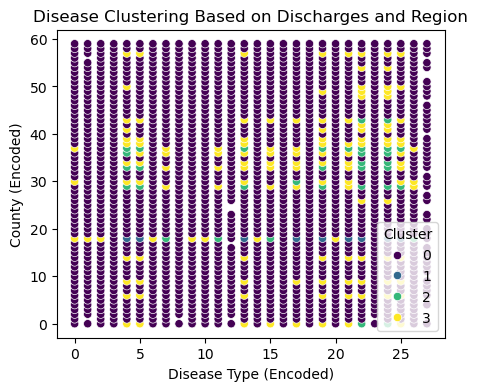

In [101]:
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
clustering_data = data.groupby(["mdc_desc", "patcnty1"])["Discharges"].sum().reset_index()

# Converting categorical data to numerical
clustering_data["Diagnosis_Code"] = clustering_data["mdc_desc"].astype("category").cat.codes
clustering_data["County_Code"] = clustering_data["patcnty1"].astype("category").cat.codes

# K-Means Clustering
X = clustering_data[["Diagnosis_Code", "County_Code", "Discharges"]]
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clustering_data["Cluster"] = kmeans.fit_predict(X)

# Scatter plot for clusters
plt.figure(figsize=(5, 4))
sns.scatterplot(data=clustering_data, x="Diagnosis_Code", y="County_Code", hue="Cluster", palette="viridis")

# Labels and title
plt.xlabel("Disease Type (Encoded)")
plt.ylabel("County (Encoded)")
plt.title("Disease Clustering Based on Discharges and Region")
plt.legend(title="Cluster")


5. Identify the Year with Maximum Discharges

In [102]:
yearly_discharges = data.groupby("dsch_yr")["Discharges"].sum()

max_discharge_year = yearly_discharges.idxmax()
max_discharges = yearly_discharges.max()

print(f"The year with the highest discharges is: {max_discharge_year} with {max_discharges} discharges.")

The year with the highest discharges is: 2012 with 3898143.0 discharges.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '3434883.0'),
  Text(1, 0, '3564285.0'),
  Text(2, 0, '3611465.0'),
  Text(3, 0, '3661147.0'),
  Text(4, 0, '3801957.0'),
  Text(5, 0, '3812962.0'),
  Text(6, 0, '3814077.0'),
  Text(7, 0, '3824711.0'),
  Text(8, 0, '3840748.0'),
  Text(9, 0, '3850007.0'),
  Text(10, 0, '3862883.0'),
  Text(11, 0, '3898143.0')])

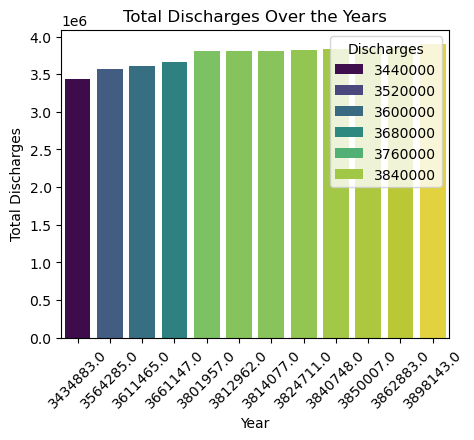

In [105]:
plt.figure(figsize=(5,4))
sns.barplot(x=yearly_discharges, y=yearly_discharges, palette="viridis",hue=yearly_discharges)
plt.title("Total Discharges Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Discharges")
plt.xticks(rotation=45)

In [107]:
numeric=data.select_dtypes(include=["number"]).columns
numeric

Index(['dsch_yr', 'mdc', 'Discharges'], dtype='object')

In [108]:
Q1=data[numeric].quantile(0.25)
Q1


dsch_yr       2015.0
mdc              6.0
Discharges      63.0
Name: 0.25, dtype: float64

In [109]:
Q3=data[numeric].quantile(0.75)
Q3

dsch_yr       2021.0
mdc             19.0
Discharges    1577.0
Name: 0.75, dtype: float64

In [110]:
IQR=Q3-Q1
IQR

dsch_yr          6.0
mdc             13.0
Discharges    1514.0
dtype: float64

In [111]:
LowerBound=Q1-1.5*IQR
LowerBound

dsch_yr       2006.0
mdc            -13.5
Discharges   -2208.0
dtype: float64

In [112]:
UpperBound=Q3+1.5*IQR
UpperBound

dsch_yr       2030.0
mdc             38.5
Discharges    3848.0
dtype: float64

In [113]:
outlier=((data[numeric]<Lowerbound) | (data[numeric]>Upperbound)).sum()
outlier

dsch_yr          0
mdc              0
Discharges    2462
dtype: int64

<Axes: >

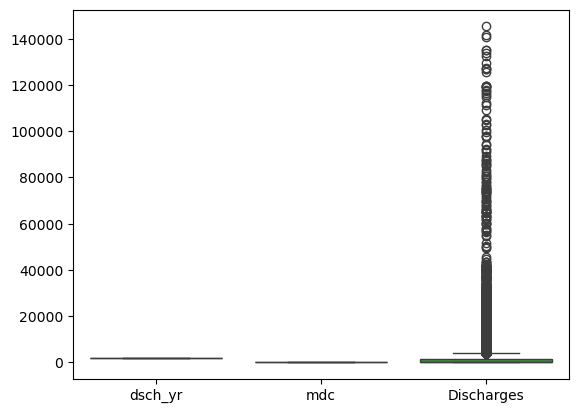

In [106]:
sns.boxplot(data[numeric])